In [1]:
import psycopg2
import pandas as pd

In [2]:
def query_psql(query):
    conn = psycopg2.connect(
    database="piragua", user='app_db',
    password='pass', host='192.168.100.123', port='5432')
    
    conn.autocommit = True
    cursor = conn.cursor()
    
    cursor.execute(query)
    results = cursor.fetchall()
    
    conn.commit()
    conn.close()
    
    return pd.DataFrame(results, columns = [col.name for col in cursor.description])

In [29]:
fecha = pd.to_datetime("2021-09-01 11:53:00").strftime("%Y-%m-%d %H:00:00")
print(fecha)

query_psql(f"""
        SELECT 1 as id, fecha, muestra as valor 
        FROM calidades_aire 
        INNER JOIN
        WHERE 
        parametro_estacion_id in (
            SELECT id FROM parametros_estacion_aire 
            WHERE estacion_aire_id IN (
                SELECT id FROM estaciones_aire))
        AND 
        calidad = 1 
        AND 
        fecha = '{fecha}'
        """)

2021-09-01 11:00:00


,id,fecha,valor
0,1,2021-09-01 11:00:00-05:00,45.0000
1,1,2021-09-01 11:00:00-05:00,13.0000
2,1,2021-09-01 11:00:00-05:00,9.0000
3,1,2021-09-01 11:00:00-05:00,18.7753
4,1,2021-09-01 11:00:00-05:00,18.0000
5,1,2021-09-01 11:00:00-05:00,32.0000
6,1,2021-09-01 11:00:00-05:00,4.0000
7,1,2021-09-01 11:00:00-05:00,53.4688
8,1,2021-09-01 11:00:00-05:00,1.4067
9,1,2021-09-01 11:00:00-05:00,3.3993


In [28]:
print(f"""
        SELECT 1 as id, fecha, muestra as valor 
        FROM calidades_aire 
        WHERE 
        parametro_estacion_id in (
            SELECT id FROM parametros_estacion_aire 
            WHERE estacion_aire_id IN (
                SELECT id FROM estaciones_aire))
        AND 
        calidad = 1 
        AND 
        fecha = '{fecha}'
        """)


        SELECT 1 as id, fecha, muestra as valor 
        FROM calidades_aire 
        WHERE 
        parametro_estacion_id in (
            SELECT id FROM parametros_estacion_aire 
            WHERE estacion_aire_id IN (
                SELECT id FROM estaciones_aire))
        AND 
        calidad = 1 
        AND 
        fecha = '2021-05-01 11:00:00'
        


In [40]:
query_psql("\\d+ estaciones_aire")

SyntaxError: syntax error at or near "\"
LINE 1: \d+ estaciones_aire
        ^


In [70]:
codigo = "ENV-EIA"
fecha_inicial = "2021-12-01 14:00:00"
fecha_final = "2021-12-02 14:00:00"

query = f"""
SELECT fecha, muestra as value, nombre
FROM calidades_aire 
WHERE 
parametro_estacion_id in (
    SELECT id FROM parametros_estacion_aire 
    WHERE estacion_aire_id IN (
        SELECT id FROM estaciones_aire
        WHERE codigo = '{codigo}'))
AND 
calidad = 1 
AND 
fecha BETWEEN '{fecha_inicial}' AND '{fecha_final}'
"""
query_psql(query)

,id,fecha,tipo_dato,calidad,muestra,parametro_estacion_id,created_at,updated_at
0,373710,2021-12-01 13:00:00-06:00,1,1,9.0000,97,2021-12-01 19:06:02.805632-06:00,2021-12-01 19:06:02.806550-06:00
1,373711,2021-12-01 14:00:00-06:00,1,1,9.0000,97,2021-12-01 19:06:02.815343-06:00,2021-12-01 19:06:02.816271-06:00
2,373718,2021-12-01 15:00:00-06:00,1,1,5.0000,97,2021-12-01 20:06:02.676047-06:00,2021-12-01 20:06:02.676672-06:00
3,373725,2021-12-01 16:00:00-06:00,1,1,12.0000,97,2021-12-01 21:06:02.666027-06:00,2021-12-01 21:06:02.666719-06:00
4,373733,2021-12-01 17:00:00-06:00,1,1,13.0000,97,2021-12-01 22:06:02.750002-06:00,2021-12-01 22:06:02.750713-06:00
5,373740,2021-12-01 18:00:00-06:00,1,1,7.0000,97,2021-12-01 23:06:02.837269-06:00,2021-12-01 23:06:02.838320-06:00
6,373747,2021-12-01 19:00:00-06:00,1,1,6.0000,97,2021-12-02 00:06:02.512149-06:00,2021-12-02 00:06:02.512804-06:00
7,373754,2021-12-01 20:00:00-06:00,1,1,11.0000,97,2021-12-02 01:06:02.546935-06:00,2021-12-02 01:06:02.548139-06:00
8,373761,2021-12-01 21:00:00-06:00,1,1,10.0000,97,2021-12-02 02:06:02.680442-06:00,2021-12-02 02:06:02.681128-06:00
9,373768,2021-12-01 22:00:00-06:00,1,1,14.0000,97,2021-12-02 03:06:03.406643-06:00,2021-12-02 03:06:03.407307-06:00


In [72]:
query_psql("SELECT * FROM parametros_estacion_aire ")

,id,frecuencia,concentracion,ica,estacion_aire_id,parametro_instrumentacion_id,icono
0,81,4,1.0000000,0E-7,147,203,26
1,83,4,1.0000000,0E-7,147,205,26
2,84,4,1.0000000,0E-7,147,210,26
3,85,4,1.0000000,0E-7,147,199,26
4,86,4,1.0000000,0E-7,147,209,26
5,87,4,1.0000000,0E-7,147,202,26
6,88,4,1.0000000,0E-7,147,208,26
7,90,4,1.0000000,0E-7,147,200,26
8,80,4,24.7663000,11.6822170,147,206,28
9,91,4,18.0226000,61.2544750,149,198,29


In [66]:
query_psql(f"""WITH metadata AS (SELECT codigo, longitud, latitud, ubicacion, parametro_instrumentacion_id, parametros_estacion_aire.id AS estacion_id, nombre, limite_norma 
            FROM parametros_estacion_aire 
            INNER JOIN
            Parametros_instrumentacion
            ON Parametros_instrumentacion.id = parametros_estacion_aire.parametro_instrumentacion_id
            INNER JOIN
            estaciones_aire
            ON estaciones_aire.id = parametros_estacion_aire.estacion_aire_id
            WHERE 
            estacion_aire_id IN (SELECT id FROM estaciones_aire)),

            datos AS (select muestra AS valor, fecha, parametro_estacion_id
            FROM calidades_aire
            WHERE calidad = 1 
            AND fecha = '{fecha}')

            SELECT codigo, valor, fecha, nombre
            FROM datos
            FULL JOIN metadata
            ON metadata.estacion_id = datos.parametro_estacion_id
            WHERE nombre = 'PM 2.5'

            """)
        

,codigo,valor,fecha,nombre
0,MED-ALTA,18.7753,2021-09-01 11:00:00-05:00,PM 2.5
1,MED-AGFS,18.0000,2021-09-01 11:00:00-05:00,PM 2.5
2,SJM-CCU,None,NaT,PM 2.5
3,GIR-TOT,4.0000,2021-09-01 11:00:00-05:00,PM 2.5
4,GIR-IGLE,7.0000,2021-09-01 11:00:00-05:00,PM 2.5
5,ENV-EIA,None,NaT,PM 2.5
6,ITA-LGO,13.0000,2021-09-01 11:00:00-05:00,PM 2.5
7,YON-PARQ,9.0000,2021-09-01 11:00:00-05:00,PM 2.5


In [59]:
query_psql("SELECT * FROM parametros_estacion_aire")

,id,frecuencia,concentracion,ica,estacion_aire_id,parametro_instrumentacion_id,icono
0,81,4,1.0000000,0E-7,147,203,26
1,83,4,1.0000000,0E-7,147,205,26
2,84,4,1.0000000,0E-7,147,210,26
3,85,4,1.0000000,0E-7,147,199,26
4,86,4,1.0000000,0E-7,147,209,26
5,87,4,1.0000000,0E-7,147,202,26
6,88,4,1.0000000,0E-7,147,208,26
7,90,4,1.0000000,0E-7,147,200,26
8,80,4,24.7663000,11.6822170,147,206,28
9,91,4,18.0226000,61.2544750,149,198,29


In [10]:
query_psql("SELECT id FROM Parametros_Estacion_Aire WHERE estacion_aire_id in (SELECT id FROM Parametros_instrumentacion WHERE nombre = 'PM 2.5')")

,id


In [12]:
query_psql("SELECT * FROM Parametros_instrumentacion")

,id,nombre,unidad,descripcion,limite_norma,tipo_parametro,horas_ica,maximo,minimo
0,199,Dirección del viento,grados,Dirección del viento,,4,NaN,None,0.0000
1,200,Flujo,l/min,Flujo,,5,NaN,None,0.0000
2,201,Humedad interna,%,Humedad interna,,5,NaN,None,0.0000
3,202,Humedad relativa,%,Humedad relativa,,4,NaN,None,0.0000
4,207,Presión,mmHg,Presión barométrica,,4,NaN,None,0.0000
5,208,Radiación solar,,Radiación solar,,4,NaN,None,0.0000
6,209,Temperatura,C,Temperatura,,4,NaN,None,0.0000
7,210,Velocidad del viento,m/s,Velocidad del viento,,4,NaN,None,0.0000
8,205,NOX,ug/m3,NOX,,1,NaN,None,0.0000
9,198,PM 2.5,ug/m3,Concentración PM 2.5,37,1,24.0,None,0.0000


In [16]:
query_psql("select * from estaciones where codigo = 'ENV-EIA'")

,id,codigo,tipo,fuente,altitud,latitud,longitud,ubicacion,database,table,codigo_ideam,categoria_ideam,emails,habilitado,municipio_id,nivel_subsiguiente_id,nivel_subsiguiente_2_id,territorial_id


In [ ]:
"""SELECT *
FROM calidades_aire 
WHERE 
parametro_estacion_id = 97 
AND 
calidad = 1 
AND 
fecha BETWEEN {fecha_inicial} AND '2021-08-12' 
"""

In [64]:
df = query_psql(f"SELECT * \
                FROM calidades_aire \
                WHERE \
                parametro_estacion_id = 97 \
                AND \
                calidad = 1 \
                AND \
                fecha >= '{fecha_inicial}' AND \
                fecha <= '{fecha_final}' \
                ")

In [58]:
f"SELECT * \
                FROM calidades_aire \
                WHERE \
                parametro_estacion_id = 97 \
                AND \
                calidad = 1 \
                AND \
                fecha BETWEEN '{fecha_inicial}' AND '{fecha_final}' \
                "

"SELECT *                 FROM calidades_aire                 WHERE                 parametro_estacion_id = 97                 AND                 calidad = 1                 AND                 fecha BETWEEN '2021-12-01 14:00:00-05:00' AND '2021-13-01 14:00:00-05:00'                 "

In [65]:
df

,id,fecha,tipo_dato,calidad,muestra,parametro_estacion_id,created_at,updated_at
0,373710,2021-12-01 13:00:00-06:00,1,1,9.0000,97,2021-12-01 19:06:02.805632-06:00,2021-12-01 19:06:02.806550-06:00
1,373711,2021-12-01 14:00:00-06:00,1,1,9.0000,97,2021-12-01 19:06:02.815343-06:00,2021-12-01 19:06:02.816271-06:00
2,373718,2021-12-01 15:00:00-06:00,1,1,5.0000,97,2021-12-01 20:06:02.676047-06:00,2021-12-01 20:06:02.676672-06:00
3,373725,2021-12-01 16:00:00-06:00,1,1,12.0000,97,2021-12-01 21:06:02.666027-06:00,2021-12-01 21:06:02.666719-06:00
4,373733,2021-12-01 17:00:00-06:00,1,1,13.0000,97,2021-12-01 22:06:02.750002-06:00,2021-12-01 22:06:02.750713-06:00
...,...,...,...,...,...,...,...,...
665,390558,2021-12-30 16:00:00-06:00,1,1,18.0000,97,2021-12-30 22:06:02.526946-06:00,2021-12-30 22:06:02.527603-06:00
666,390577,2021-12-30 17:00:00-06:00,1,1,11.0000,97,2021-12-30 23:06:03.365239-06:00,2021-12-30 23:06:03.370048-06:00
667,390596,2021-12-30 18:00:00-06:00,1,1,11.0000,97,2021-12-31 00:06:02.651590-06:00,2021-12-31 00:06:02.652477-06:00
668,390615,2021-12-30 19:00:00-06:00,1,1,11.0000,97,2021-12-31 01:06:02.626798-06:00,2021-12-31 02:39:01.483208-06:00


In [81]:
df.loc[:, "muestra"] = df.loc[:, "muestra"].astype(float)
df.loc[:, "fecha"] = pd.to_datetime(df.loc[:, "fecha"])

<AxesSubplot:xlabel='fecha'>

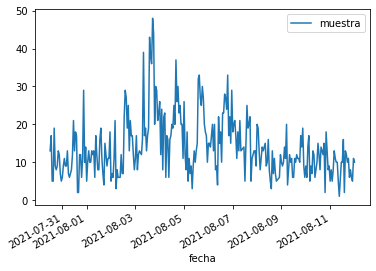

In [87]:
df.plot(x = "fecha", y = "muestra", kind = "line")

In [89]:
df.loc[:, ["fecha", "muestra"]].sort_values("fecha").set_index("fecha").to_csv("prueba.csv")

In [90]:
df

,id,fecha,tipo_dato,calidad,muestra,parametro_estacion_id,created_at,updated_at
0,275513,2021-08-07 12:00:00-05:00,1,1,5.0,97,2021-08-17 00:30:31.414546-05:00,2021-08-17 00:30:31.418436-05:00
1,275746,2021-08-03 09:00:00-05:00,1,1,17.0,97,2021-08-17 00:30:37.025091-05:00,2021-08-17 00:30:37.028024-05:00
2,275747,2021-08-03 10:00:00-05:00,1,1,19.0,97,2021-08-17 00:30:37.042520-05:00,2021-08-17 00:30:37.052880-05:00
3,275788,2021-08-10 19:00:00-05:00,1,1,2.0,97,2021-08-17 00:30:38.176611-05:00,2021-08-17 00:30:38.186478-05:00
4,276436,2021-08-08 19:00:00-05:00,1,1,5.0,97,2021-08-17 00:31:00.045375-05:00,2021-08-17 00:31:00.049770-05:00
...,...,...,...,...,...,...,...,...
290,326577,2021-08-07 04:00:00-05:00,1,1,11.0,97,2021-08-17 01:02:28.901091-05:00,2021-08-17 01:02:28.903534-05:00
291,326677,2021-08-11 09:00:00-05:00,1,1,1.0,97,2021-08-17 01:02:35.735249-05:00,2021-08-17 01:02:35.745467-05:00
292,326916,2021-08-01 14:00:00-05:00,1,1,19.0,97,2021-08-17 01:02:45.326070-05:00,2021-08-17 01:02:45.329961-05:00
293,327068,2021-08-04 06:00:00-05:00,1,1,6.0,97,2021-08-17 01:02:49.218187-05:00,2021-08-17 01:02:49.222463-05:00


In [54]:
df.loc[0:df.fecha.size//5:df.fecha.size, 'fecha']

0   2021-08-07 12:00:00-05:00
Name: fecha, dtype: datetime64[ns, UTC-05:00]

In [63]:
df.loc[range(0, df.fecha.size, df.fecha.size//5), 'fecha']

0     2021-08-07 12:00:00-05:00
59    2021-08-05 21:00:00-05:00
118   2021-08-11 13:00:00-05:00
177   2021-08-11 14:00:00-05:00
236   2021-08-02 09:00:00-05:00
Name: fecha, dtype: datetime64[ns, UTC-05:00]

In [71]:
d = [{"valor": 8.0, "variable": "PM 2.5", "codigo": "ITA-LGO"}, {"valor": 11.0, "variable": "PM 2.5", "codigo": "GIR-TOT"}, {"valor": 140.7404, "variable": "O3", "codigo": "GIR-TOT"}, {"valor": 0.7444, "variable": "NO", "codigo": "GIR-TOT"}, {"valor": 2.2403, "variable": "NO2", "codigo": "GIR-TOT"}, {"valor": 1.9372, "variable": "NOX", "codigo": "GIR-TOT"}, {"valor": 0.4736, "variable": "Velocidad del viento", "codigo": "GIR-TOT"}, {"valor": 320.9052, "variable": "Direcci\u00f3n del viento", "codigo": "GIR-TOT"}, {"valor": 4.136, "variable": "Temperatura", "codigo": "GIR-TOT"}, {"valor": 51.9599, "variable": "Humedad relativa", "codigo": "GIR-TOT"}, {"valor": 320.7322, "variable": "Radiaci\u00f3n solar", "codigo": "GIR-TOT"}, {"valor": 641.0496, "variable": "Presi\u00f3n", "codigo": "GIR-TOT"}, {"valor": 15.6982, "variable": "Flujo", "codigo": "GIR-TOT"}, {"valor": 33.8876, "variable": "PM 2.5", "codigo": "MED-ALTA"}, {"valor": 4.0, "variable": "PM 10", "codigo": "AMA-FER"}, {"valor": 4.0, "variable": "PM 2.5", "codigo": "YON-PARQ"}, {"valor": 33.0, "variable": "PM 2.5", "codigo": "MED-AGFS"}, {"valor": 10.0, "variable": "PM 2.5", "codigo": "ENV-EIA"}, {"valor": 13.0, "variable": "PM 10", "codigo": "CAU-ALC"}, {"valor": None, "variable": "PM 2.5", "codigo": "GIR-IGLE"}, {"valor": None, "variable": "Presi\u00f3n", "codigo": "GIR-TOT"}, {"valor": None, "variable": "PM 2.5", "codigo": "SJM-CCU"}]

In [73]:
dic = {}
for i in d:
    dic[i["codigo"]] = {}

for i in d:
    dic[i["codigo"]][i["variable"]] = i["valor"]

dic

{'ITA-LGO': {'PM 2.5': 8.0},
 'GIR-TOT': {'PM 2.5': 11.0,
  'O3': 140.7404,
  'NO': 0.7444,
  'NO2': 2.2403,
  'NOX': 1.9372,
  'Velocidad del viento': 0.4736,
  'Dirección del viento': 320.9052,
  'Temperatura': 4.136,
  'Humedad relativa': 51.9599,
  'Radiación solar': 320.7322,
  'Presión': None,
  'Flujo': 15.6982},
 'MED-ALTA': {'PM 2.5': 33.8876},
 'AMA-FER': {'PM 10': 4.0},
 'YON-PARQ': {'PM 2.5': 4.0},
 'MED-AGFS': {'PM 2.5': 33.0},
 'ENV-EIA': {'PM 2.5': 10.0},
 'CAU-ALC': {'PM 10': 13.0},
 'GIR-IGLE': {'PM 2.5': None},
 'SJM-CCU': {'PM 2.5': None}}